In [66]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
dataset_root = 'nsl-kdd'
train_file = os.path.join(dataset_root, 'KDDTrain+.txt')
test_file = os.path.join(dataset_root, 'KDDTest+.txt')
header_names = ['duration', 'protocol_type', 'service', 'flag',
                'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                'urgent', 'hot', 'num_failed_logins', 'logged_in',
                'num_compromised', 'root_shell', 'su_attempted',
                'num_root', 'num_file_creations', 'num_shells',
                'num_access_files', 'num_outbound_cmds',
                'is_host_login', 'is_guest_login', 'count',
                'srv_count', 'serror_rate', 'srv_serror_rate',
                'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
                'diff_srv_rate', 'srv_diff_host_rate',
                'dst_host_count', 'dst_host_srv_count',
                'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                'dst_host_serror_rate', 'dst_host_srv_serror_rate',
                'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
                'attack_type', 'success_pred']
col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()
category = defaultdict(list)
category['benign'].append('normal')

with open('training_attack_types.txt', 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

This cell is setting up the initial data processing for a machine learning task. It's working with a dataset related to network intrusion detection (NSL-KDD dataset).

1. It first sets up the paths to the training and testing data files.
2. It then defines the column names (header_names) for the data, which include various features related to network traffic and the type of attack.
3. The column names are converted to a numpy array (col_names).
4. It identifies the indices of nominal (categorical), binary, and numeric features in the dataset.
5. It creates lists of the column names for each type of feature (nominal_cols, binary_cols, numeric_cols).
6. It initializes a dictionary (category) to map attack types to categories, and adds 'normal' to the 'benign' category.
7. It reads a file (training_attack_types.txt) that contains mappings of attack types to categories. For each line in the file, it splits the line into an attack type and a category, and adds the attack type to the appropriate category in the category dictionary.
8. Finally, it creates a dictionary (attack_mapping) that maps each attack type to its category. This will be used later to label the data.

In [68]:
print(numeric_cols)

['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [69]:
import pandas as pd
import os

# Assuming your dataset_root and train_file are defined as in your code
dataset_root = 'nsl-kdd'
train_file = os.path.join(dataset_root, 'KDDTrain+.txt')
header_names = ['duration', 'protocol_type', 'service', 'flag',
                'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                'urgent', 'hot', 'num_failed_logins', 'logged_in',
                'num_compromised', 'root_shell', 'su_attempted',
                'num_root', 'num_file_creations', 'num_shells',
                'num_access_files', 'num_outbound_cmds',
                'is_host_login', 'is_guest_login', 'count',
                'srv_count', 'serror_rate', 'srv_serror_rate',
                'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
                'diff_srv_rate', 'srv_diff_host_rate',
                'dst_host_count', 'dst_host_srv_count',
                'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                'dst_host_serror_rate', 'dst_host_srv_serror_rate',
                'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
                'attack_type', 'success_pred']

# Read the dataset
train_df = pd.read_csv(train_file, names=header_names)
unique_attack_types = train_df['attack_type'].unique()
print(unique_attack_types)
output_file = 'training_attack_types.txt'
with open(output_file, 'w') as f:
    for attack_type in unique_attack_types:
        f.write(f"{attack_type}\n")


['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


This cell is responsible for loading the training dataset and extracting unique attack types:

1. It first imports the necessary libraries (pandas and os).
2. It then sets up the path to the training data file (train_file).
3. It reads the training data file into a pandas DataFrame (train_df), using the predefined header_names as column names.
4. It extracts the unique attack types from the 'attack_type' column of the DataFrame and stores them in unique_attack_types.
5. It then writes these unique attack types to a new file (training_attack_types.txt), with each attack type on a new line. This file will be used later to map attack types to categories.

['neptune' 'normal' 'saint' 'mscan' 'guess_passwd' 'smurf' 'apache2'
 'satan' 'buffer_overflow' 'back' 'warezmaster' 'snmpgetattack'
 'processtable' 'pod' 'httptunnel' 'nmap' 'ps' 'snmpguess' 'ipsweep'
 'mailbomb' 'portsweep' 'multihop' 'named' 'sendmail' 'loadmodule' 'xterm'
 'worm' 'teardrop' 'rootkit' 'xlock' 'perl' 'land' 'xsnoop' 'sqlattack'
 'ftp_write' 'imap' 'udpstorm' 'phf']


<Axes: ylabel='attack_type'>

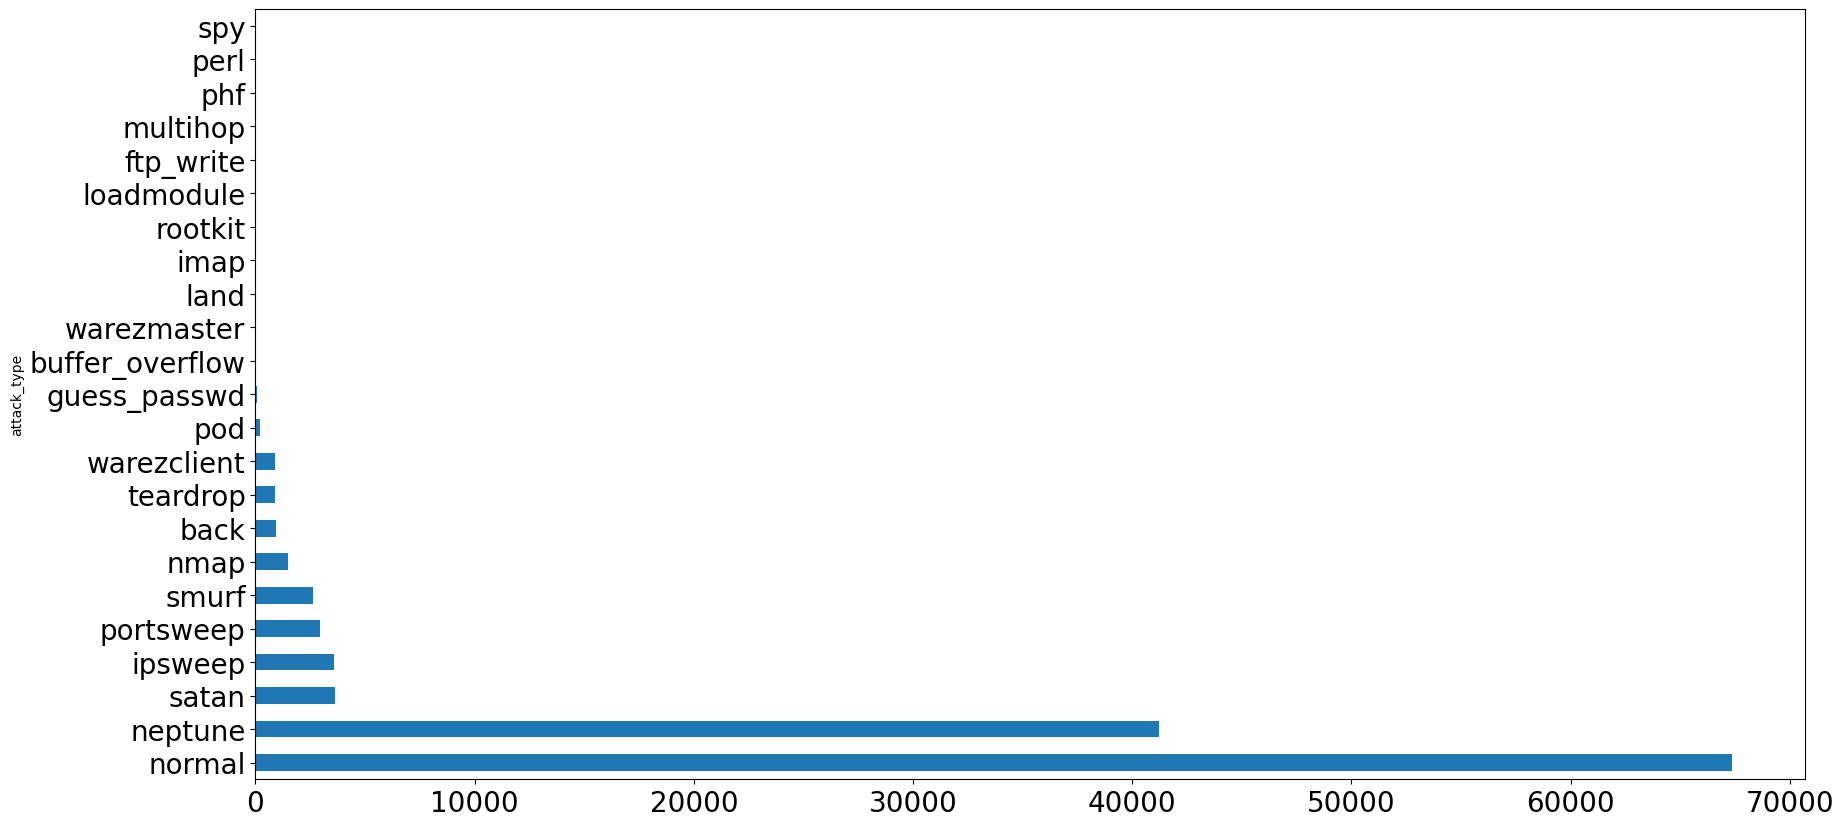

In [81]:
train_df = pd.read_csv(train_file, names=header_names)
train_df['attack_category'] = train_df['attack_type'].map(lambda x: attack_mapping[x])
train_df.drop(['success_pred'], axis=1, inplace=True)

test_df = pd.read_csv(test_file, names=header_names)

unique_attack_types = test_df['attack_type'].unique()
print(unique_attack_types)


test_df['attack_category'] = test_df['attack_type'].map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()
test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()
train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

This cell is responsible for loading the training and testing datasets, mapping the attack types to their categories, and visualizing the distribution of attack types:

1. It reads the training and testing data files into pandas DataFrames (train_df and test_df), using the predefined header_names as column names.
2. It maps the 'attack_type' in both datasets to their respective categories using the previously created attack_mapping dictionary and stores the result in a new column 'attack_category'.
3. It drops the 'success_pred' column from both datasets as it's not needed for the analysis.
4. It extracts the unique attack types from the 'attack_type' column of the test DataFrame and prints them.
5. It calculates the frequency of each attack type and attack category in both datasets and stores the results in train_attack_types, train_attack_cats, test_attack_types, and test_attack_cats.
6. Finally, it creates a horizontal bar plot of the frequency of each attack type in the training dataset. The plot's size and font size are also specified.

<Axes: ylabel='attack_category'>

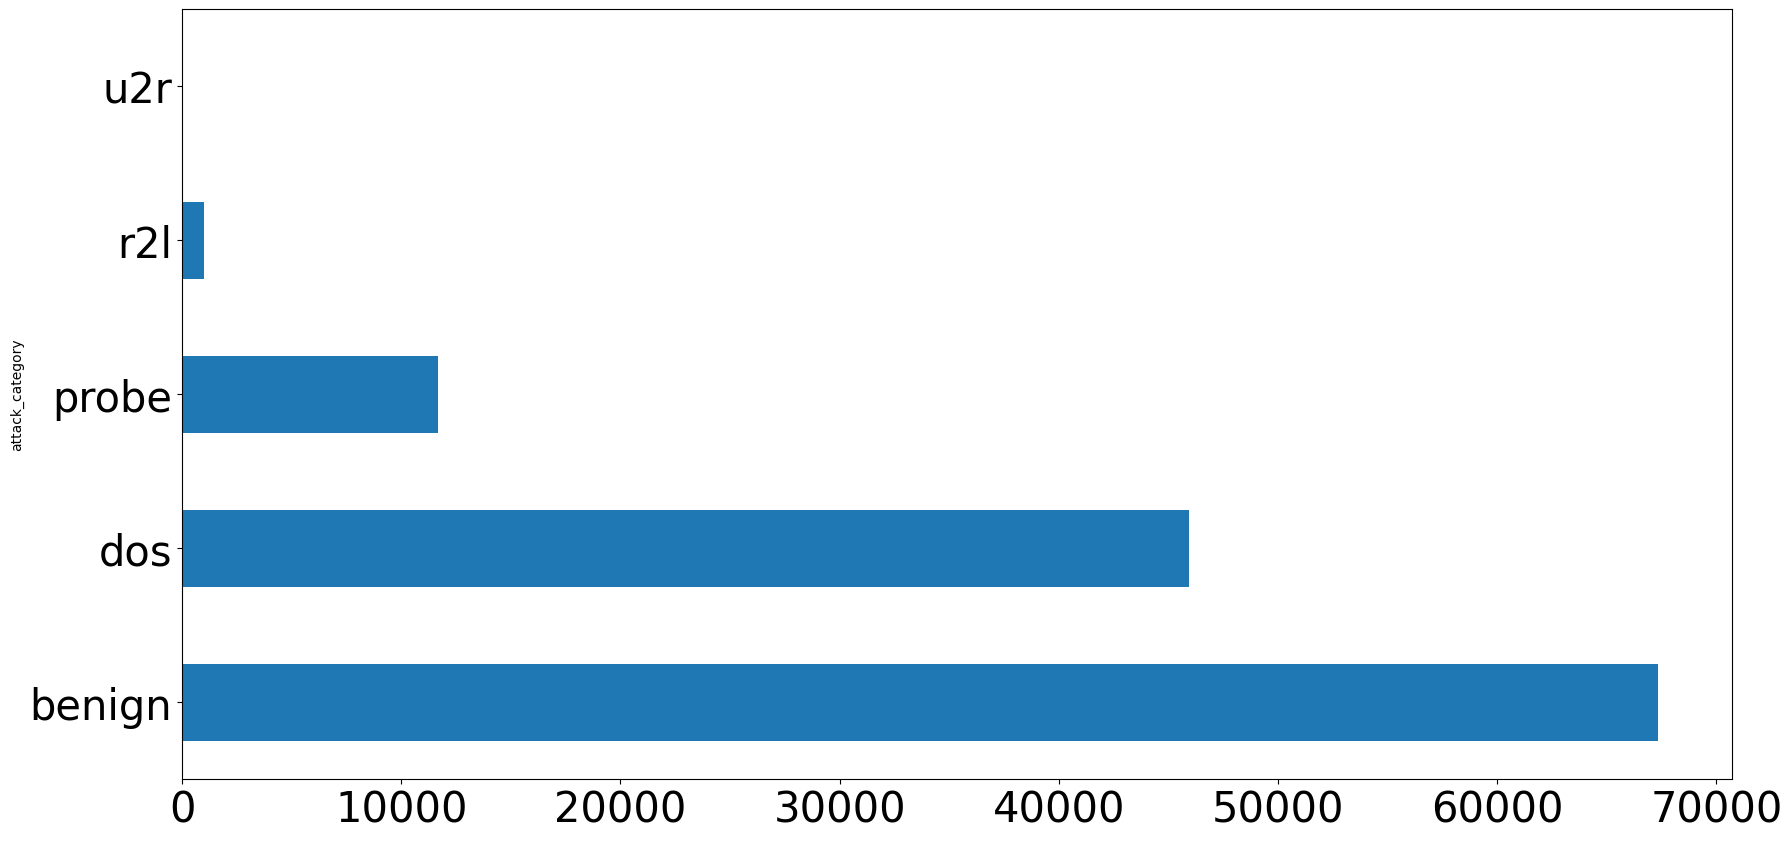

In [82]:
train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

In [83]:
train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)

This cell is preparing the data for the machine learning model:

1. It separates the target variable ('attack_category') from the feature variables in both the training and testing datasets. The target variables are stored in train_Y and test_Y.
2. It drops the 'attack_category' and 'attack_type' columns from the training and testing datasets as these are now stored separately. The resulting feature datasets are stored in train_x_raw and test_x_raw.

In [84]:
combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

This cell is preparing the feature data for the machine learning model:

1. It first combines the training and testing feature datasets into one DataFrame (combined_df_raw).
2. It then converts the nominal (categorical) columns in the combined dataset into dummy/indicator variables (one-hot encoding) using the pd.get_dummies function. The resulting DataFrame is stored in combined_df.
3. It separates the combined dataset back into training (train_x) and testing (test_x) datasets based on the original lengths.
4. Finally, it stores the names of the newly created dummy variables in dummy_variables by finding the difference between the column names in train_x and combined_df_raw.

In [85]:
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

count    1.259730e+05
mean     2.549477e-17
std      1.000004e+00
min     -1.102492e-01
25%     -1.102492e-01
50%     -1.102492e-01
75%     -1.102492e-01
max      1.636428e+01
dtype: float64

This cell is performing standard scaling on the 'duration' feature of the training data:

1. It first imports the StandardScaler class from the sklearn.preprocessing module.
2. It then extracts the 'duration' values from the training data (train_x) and reshapes them into a 2D array (durations).
3. It fits the StandardScaler to the 'duration' data, which calculates the mean and standard deviation of the data.
4. It then transforms the 'duration' data using the fitted scaler, which standardizes the data by subtracting the mean and scaling to unit variance. The standardized data is stored in scaled_durations.
5. Finally, it converts the standardized data into a pandas Series and prints the descriptive statistics of the data using the describe method.

In [86]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

count    125973.000000
mean          0.006692
std           0.060700
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64

This cell is performing Min-Max scaling on the 'duration' feature of the training data:

1. It first imports the MinMaxScaler class from the sklearn.preprocessing module.
2. It fits the MinMaxScaler to the 'duration' data (durations), which calculates the minimum and maximum values of the data.
3. It then transforms the 'duration' data using the fitted scaler, which scales the data to a specified range (default is 0 to 1). The scaled data is stored in min_max_scaled_durations.
4. Finally, it converts the scaled data into a pandas Series and prints the descriptive statistics of the data using the describe method.

In [87]:
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

count    125973.00000
mean        287.14465
std        2604.51531
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       42908.00000
dtype: float64

This cell is performing Robust scaling on the 'duration' feature of the training data:

1. It first imports the RobustScaler class from the sklearn.preprocessing module.
2. It fits the RobustScaler to the 'duration' data (durations), which calculates the Interquartile Range (IQR) of the data.
3. It then transforms the 'duration' data using the fitted scaler, which scales the data using the IQR and reduces the impact of outliers. The scaled data is stored in robust_scaled_durations.
4. Finally, it converts the scaled data into a pandas Series and prints the descriptive statistics of the data using the describe method.

In [88]:
print(train_x.columns)



Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=119)


In [89]:
standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x.loc[:, numeric_cols] = standard_scaler.transform(train_x[numeric_cols])
test_x.loc[:, numeric_cols] = standard_scaler.transform(test_x[numeric_cols])

This cell is performing standard scaling on the numeric features of both the training and testing data:

1. It fits the StandardScaler to the numeric columns of the training data (train_x[numeric_cols]), which calculates the mean and standard deviation of these columns.
2. It then transforms the numeric columns in the training data using the fitted scaler, which standardizes the data by subtracting the mean and scaling to unit variance. The standardized data replaces the original data in the train_x DataFrame.
3. It also transforms the numeric columns in the testing data (test_x) using the same scaler, ensuring that the scaling is consistent across both datasets. The standardized data replaces the original data in the test_x DataFrame.

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(train_x, train_Y)
pred_y = classifier.predict(test_x)
results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

This cell is training a Decision Tree Classifier on the training data and evaluating its performance on the testing data:

1. It first imports the DecisionTreeClassifier class from the sklearn.tree module, and the confusion_matrix and zero_one_loss functions from the sklearn.metrics module.
2. It then initializes a DecisionTreeClassifier with a random state of 0 for reproducibility, and fits the classifier to the training data (train_x and train_Y).
3. It uses the trained classifier to predict the attack categories for the testing data (test_x), and stores the predictions in pred_y.
4. It calculates the confusion matrix between the true and predicted attack categories for the testing data, and stores the result in results.
5. Finally, it calculates the zero-one loss (fraction of misclassifications) between the true and predicted attack categories for the testing data, and stores the result in error.

In [91]:
print(results)
print(error)

[[9361   60  289    1    0]
 [1236 6126   97    1    0]
 [ 893  215 1503    3    0]
 [2514    3   16  170    6]
 [  36    0    0    4   10]]
0.23837828246983672


The printed results and error are related to the performance of the Decision Tree Classifier on the testing data.

1. The first two arrays are the unique attack types in the training and testing datasets respectively. They show the different types of network intrusions that the model is trained to detect.

2. The <Axes: ylabel='attack_type'> and <Axes: ylabel='attack_category'> are the outputs of the bar plots showing the distribution of attack types and attack categories in the training dataset.

3. The three blocks of descriptive statistics (mean, std, min, 25%, 50%, 75%, max) are related to the 'duration' feature of the training data after applying standard scaling, Min-Max scaling, and Robust scaling respectively. They show that the data has been successfully scaled.

4. The Index([...], dtype='object', length=119) is the output of print(train_x.columns), showing the column names in the training feature dataset after one-hot encoding the nominal features.

5. The array ['duration', 'src_bytes', 'dst_bytes', ...] is the output of print(numeric_cols), showing the names of the numeric features in the dataset.

6. The 2D array [[9361 60 289 1 0] ... [ 36 0 0 4 10]] is the confusion matrix between the true and predicted attack categories for the testing data. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class.

7. The 0.23837828246983672 is the zero-one loss (fraction of misclassifications) between the true and predicted attack categories for the testing data. It shows that the model has an error rate of approximately 23.84%.